## Einzelne Antenne: $\frac{\lambda}{2}$-Dipol  (Fernfeld)

### Annahmen:

- Far-Field => kr>>1 (Mobilfunk)
- Antenne ist unendlich dünn

### Vektorpotential

### Felder
#### $E_r$:
$$
    E_r = \eta \frac{I_0l\cos\theta}{2\pi r^2}(1+\frac1{jkr})e^{-jkr}
$$
$E_r$ ist invers proportional zu $r^2$
da kr>>1 folgt:

$$
    \color{red}\boxed{\color{black}E_r=0}

$$

#### $E_\theta$:

$$
    E_\theta = j\eta\frac{kI_0l\sin\theta}{4\pi r}(1+\frac 1{jkr}-\frac 1{(kr)^2})e^{-jkr}
$$
$$
    \color{red}\boxed{\color{black}E_\theta = j\eta\frac{kI_0e^{-jkr}}{4\pi r}\sin\theta}
$$

#### $H_\phi$:

$$
    H_\phi = j\frac{kI_0l\sin\theta}{4\pi r}(1+\frac 1{jkr})e^{-jkr}
$$
$$
    \color{red}\boxed{\color{black}H_\phi = j\frac{kI_0le^{-jkr} }{4\pi r}\sin\theta}
$$
Diese Formeln gelten noch für den Infinitesimalen Dipol

#### Stromdichteverteilung Finiten Dipol
$I_0$ ist nicht mehr konstant:
$$
    I_e(x'=0,y'=0,z')= \begin{cases}
                            â_zI_0\sin[k(\frac l2 - z')] & 0 \geq z' \geq \frac l2 \\
                            â_zI_0\sin[k(\frac l2 + z')]& -\frac l2 \geq z' \geq 0
                        \end{cases}
$$

### Betrachtung R
$$
    R = \sqrt {(x-x')^2+(y-y')^2+(z-z')^2}
$$
da x' = y' = 0
$$
    R = \sqrt {x^2+y^2+(z-z')^2}\\
    = \sqrt {x^2+y^2+z^2+(-2zz'+z'^2)}
$$
mit $r^2 = x^2+y^2+z^2$ und z in Kugelkoordinaten = $r\cos \theta$
$$
    R = \sqrt {r^2+(-2r\cos \theta z'+z'^2)}
$$

umformen, sodass wir die Form $\sqrt {1+x}$ bekommen:

$$
    R = r \sqrt{1+ \frac{-2r\cos \theta z' + z'^2}{r^2}}
$$

hinterer Term entspricht x

$$
    \sqrt{1+x} = 1+\frac x2 - \frac{x^2}{8} + \dots
$$

Daraus folgt:

$$
    R = r(1+\frac 12(\frac{-2r\cos\theta z' + z'^2}{r^2})+\dots)
$$
durch umformen und betrachten der ersten beiden Terme folgt:

$$
    R \approx r - z'\cos\theta
$$

aus Literatur:
- Phasenterme: $R\approx r - z' \cos\theta$
- Amplitudenterme: $R\approx r$

#### Elektrisches Feld:

Durch Einsetzten von R und $I_e$ und umformen folgt:

$$
    dE_\theta \approx j\eta \frac{kI_e(x',y',z')e^{-jkr}}{4\pi r}\sin\theta e^{jkz'cos\theta}dz'
$$

Integration über die Länge der Antenne ergibt das el. Feld für den Finiten Dipol:
$$
    E_\theta = \int_{-\frac l2}^{\frac l2} dE_\theta = \int_{-\frac l2}^{0} dE_\theta + \int_{0}^{\frac l2} dE_\theta
$$
$$
    E_\theta = j\eta \frac{ke^{-jkr}}{4\pi r}\sin\theta \Bigg(\int_{-\frac l2}^{0} \sin\Big(k\Big(\frac l2 + z'\Big)\Big)e^{jkz'\cos\theta}dz' + \int_{0}^{\frac l2} \sin\Big(k\Big(\frac l2 - z'\Big)\Big)e^{jkz'\cos\theta}dz'\Bigg)
$$

mit $\int e^{\alpha x} \sin(\beta x + \gamma) dx = \frac{e^{\alpha x}}{\alpha ^2 + \beta ^2}(\alpha \sin(\beta x + \gamma)-\beta \cos(\beta x + \gamma))$
und $\alpha = jk\cos\theta$, $\beta = \pm k$ und $\gamma = \frac{kl}{2}$
folgt mit einiger Umformung:

$$
    \color{red} \boxed { \color{black}
    		E_\theta \approx j\eta \frac{I_0e^{-jkr}}{2\pi r}
            \Bigg[
            	\frac{
                			\cos \Big(\frac {kl}{2} \cos\theta\Big)
                       		-\cos\Big(\frac{kl}{2}\Big)
                       }	
                       {
                       		\sin\theta}
             \Bigg]
    }
$$

#### Magnetisches Feld

$$
    \color{red}\boxed{\color{black}H_\phi \approx \frac{E_\theta}{\eta} = j \frac{I_0e^{-jkr}}{2\pi r}\Bigg[\frac{\cos \Big(\frac {kl}{2}\cos\theta\Big)-\cos\Big(\frac{kl}{2}\Big)}{\sin\theta}\Bigg]}
$$

### Plots der Felder

In [3]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from IPython.display import HTML

In [4]:
x, y, z       = sp.symbols('x y z')
r, theta, phi = sp.symbols('r theta phi')

In [8]:
def transform_to_xyz(expr, x, y, z):
    """
        Transformiert eine Funktion die von r, theta, phi abhängt auf eine Funkion die von             x,y,z abhängt.
    """
    return expr.subs([(r    , sp.sqrt (x**2 + y**2 + z**2)), 
                      (theta, sp.acos (z / sp.sqrt(x**2 + y**2 + z**2))), 
                      (phi  , sp.atan2(y, x))])

In [9]:
def get_H_phi_finite(r, theta, phi):
    I_0 = 1
    c_0 = 3e8
    f = 1.8e9
    lamd = c_0/f
    k = 2*sp.pi/lamd
    l = 0.5*lamd
    
    factor = (I_0 * sp.exp(-1j * k*r))/((2 * sp.pi * r))
    phasefactor = (sp.cos(((k*l)/2)*sp.cos(theta)) - sp.cos(k*l/2))/sp.sin(theta)
    
    return 1j* factor * phasefactor

In [10]:
def unitvector_theta(H_theta, theta, phi):
    x = H_theta * sp.cos(theta) * sp.cos(phi)
    y = H_theta * sp.cos(theta) * sp.sin(phi) 
    z = H_theta * -1*sp.sin(theta)
    return x, y, z

In [11]:
def unitvector_phi(H_phi, theta, phi):
    x = H_phi * -1 * sp.sin(theta)*sp.sin(phi)
    y = H_phi *      sp.sin(theta)*sp.cos(phi)
    # z Komponente muss später noch auf 0 gesetzt werden -> r ist natürlich falsch -->hier Dummy einfügen anstatt r
    z = r
    return x, y, z

In [6]:
get_H_phi_finite(r, theta, phi)

0.5*I*exp(-12.0*I*pi*r)*cos(pi*cos(theta)/2)/(pi*r*sin(theta))

In [12]:
H_r, H_theta, H_phi = unitvector_phi(
    get_H_phi_finite(r,theta,phi), theta, phi)

# Da der Koeffizient komplex ist werden nur die Beträge genommen
xx = transform_to_xyz(H_r, x, y, z)
yy = transform_to_xyz(H_theta, x, y, z)
# z wird hier auf 0 aus dem Einheitsvektor gesetzt
zz = 0
xx_func = sp.lambdify((x, y, z), xx, modules='numpy')
yy_func = sp.lambdify((x, y, z), yy, modules='numpy')
zz_func = sp.lambdify((x, y, z), zz, modules='numpy')
xx

-0.5*I*y*exp(-12.0*I*pi*sqrt(x**2 + y**2 + z**2))*cos(pi*z/(2*sqrt(x**2 + y**2 + z**2)))/(pi*sqrt(x**2 + y**2)*sqrt(x**2 + y**2 + z**2))

In [13]:
def H_finite(x,y,z):
    return np.array([np.real(xx_func(x,y,z)),
                     np.real(yy_func(x,y,z)),
                     np.real(zz_func(x,y,z))])

In [14]:
start = -10
stop = 10
samples = 8

x_range = np.linspace(start, stop, samples)
y_range = np.linspace(start, stop, samples)
z_range = np.linspace(start, stop, samples)
X, Y, Z = np.meshgrid(x_range, y_range, z_range)
H_field = np.vectorize(H_finite, signature='(),(),()->(n)')(X, Y, Z)

In [15]:
H_x = H_field[:,:,:,0]
H_y = H_field[:,:,:,1]
H_z = H_field[:,:,:,2]
H_y.max()

0.02306516321278804

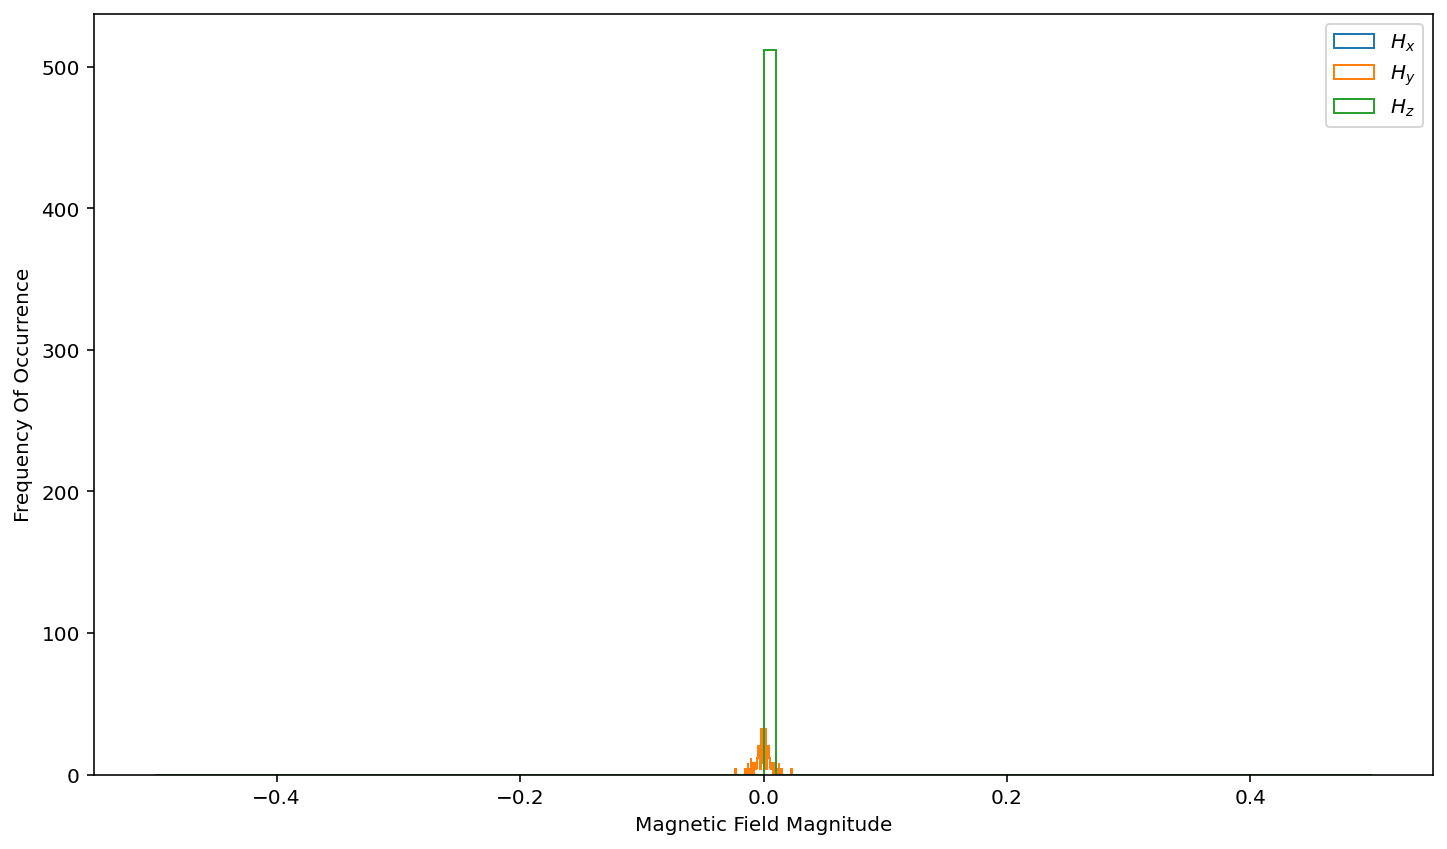

In [16]:
plt.hist(H_x.ravel(), bins=100, histtype='step',label=r'$H_x$')
plt.hist(H_y.ravel(), bins=100, histtype='step',label=r'$H_y$')
plt.hist(H_z.ravel(), bins=100, histtype='step',label=r'$H_z$')
plt.legend()
plt.xlabel('Magnetic Field Magnitude')
plt.ylabel('Frequency Of Occurrence')
plt.show()

In [17]:
H_max = 0.03
H_x[H_x>H_max] = H_max
H_y[H_y>H_max] = H_max
H_z[H_z>H_max] = H_max

H_x[H_x<-H_max] = -H_max
H_y[H_y<-H_max] = -H_max
H_z[H_z<-H_max] = -H_max

In [18]:
l = 1
tt = np.linspace(-l/2, l/2, 1000)
lx, ly, lz = 0*tt, 0*tt, 1*tt

In [19]:
# Definition des Vektorfeldes: Ortsvektor, H-Feld -> Komponenten müssen 1-d übergeben werden, daher wird .ravel() verwendet
data = go.Cone(x=X.ravel(), y=Y.ravel(), z=Z.ravel(),
               u=H_x.ravel(), v=H_y.ravel(), w=H_z.ravel(),
               colorscale='Inferno', colorbar=dict(title=r'$x^2$ norm'),
               sizemode="scaled", sizeref=0.5)
# Achsenbeschriftungen etc.
layout = go.Layout(title=f'Magnetic Field of Dipole only with H_Phi Komponent in tangential Direction',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)

fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                 line=dict(color='green', width=10))


# Anzeigegröße des HTML Outputs festlegen
HTML(fig.to_html(default_width=1000, default_height=600))

In [21]:
x, y, z       = sp.symbols('x y z')
r, theta, phi = sp.symbols('r theta phi')

In [22]:
eta = 1

E_theta = eta*get_H_phi_finite(r, theta, phi)

E_x,E_y,E_z =  unitvector_theta(E_theta, theta, phi)

xx = transform_to_xyz(E_x, x, y, z)
yy = transform_to_xyz(E_y, x, y, z)
zz = transform_to_xyz(E_z, x, y, z)

E_xx_func = sp.lambdify((x, y, z), xx, modules='numpy')
E_yy_func = sp.lambdify((x, y, z), yy, modules='numpy')
E_zz_func = sp.lambdify((x, y, z), zz, modules='numpy')

In [23]:
def E_finite(x,y,z):
    return np.array([np.real(E_xx_func(x,y,z)),
                     np.real(E_yy_func(x,y,z)),
                     np.real(E_zz_func(x,y,z))])

In [24]:
start = -3
stop = 3
samples = 8

x_range = np.linspace(start, stop, samples)
y_range = np.linspace(start, stop, samples)
z_range = np.linspace(start, stop, samples)
X, Y, Z = np.meshgrid(x_range, y_range, z_range)
E_field = np.vectorize(E_finite, signature='(),(),()->(n)')(X, Y, Z)

In [25]:
E_x = E_field[:,:,:,0]
E_y = E_field[:,:,:,1]
E_z = E_field[:,:,:,2]
E_x.max()

0.03485221124366641

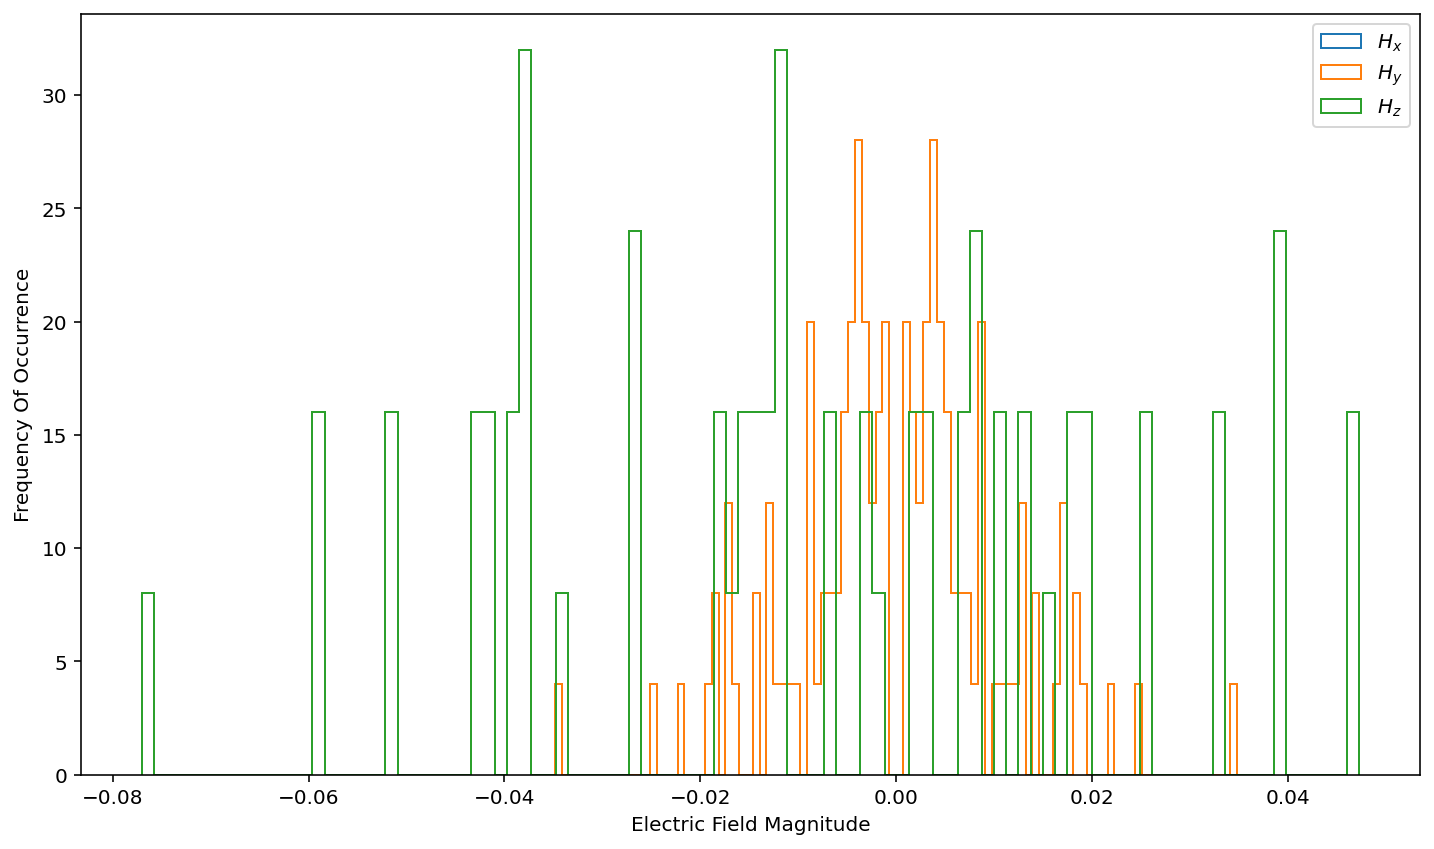

In [26]:
plt.hist(E_x.ravel(), bins=100, histtype='step',label=r'$H_x$')
plt.hist(E_y.ravel(), bins=100, histtype='step',label=r'$H_y$')
plt.hist(E_z.ravel(), bins=100, histtype='step',label=r'$H_z$')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency Of Occurrence')
plt.show()

In [27]:
E_max = 0.1
E_x[E_x>E_max] = E_max
E_y[E_y>E_max] = E_max
E_z[E_z>E_max] = E_max

E_x[E_x<-E_max] = -E_max
E_y[E_y<-E_max] = -E_max
E_z[E_z<-E_max] = -E_max

In [28]:
# Definition des Vektorfeldes: Ortsvektor, H-Feld -> Komponenten müssen 1-d übergeben werden, daher wird .ravel() verwendet
data = go.Cone(x=X.ravel(), y=Y.ravel(), z=Z.ravel(),
               u=E_x.ravel(), v=E_y.ravel(), w=E_z.ravel(),
               colorscale='Inferno', colorbar=dict(title=r'$x^2$ norm'),
               sizemode="scaled", sizeref=0.5)
# Achsenbeschriftungen etc.
layout = go.Layout(title=f'Electric Field of Dipole only with E_theta Komponent in tangential Direction',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                #aspectratio=dict(x=1, y=1, z=1),
                                #camera_eye=dict(x=1.2, y=1.2, z=1.2)
                                )
                                )

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))

# Anzeigegröße des HTML Outputs festlegen
HTML(fig.to_html(default_width=1000, default_height=600))

In [29]:
start = -0.5
stop = 0.5
N = 2**7

x_range = np.linspace(start, stop, N)
y_range = np.linspace(start, stop, N)
z_range = np.linspace(start, stop, N)
X, Y, Z = np.meshgrid(x_range, y_range, z_range, indexing='ij')

relative_height_x_direction = 100
x, y, z = 0, 1, 2

In [30]:
E_field = np.vectorize(E_finite, signature='(),(),()->(n)')(X, Y, Z)

Text(0, 0.5, 'z')

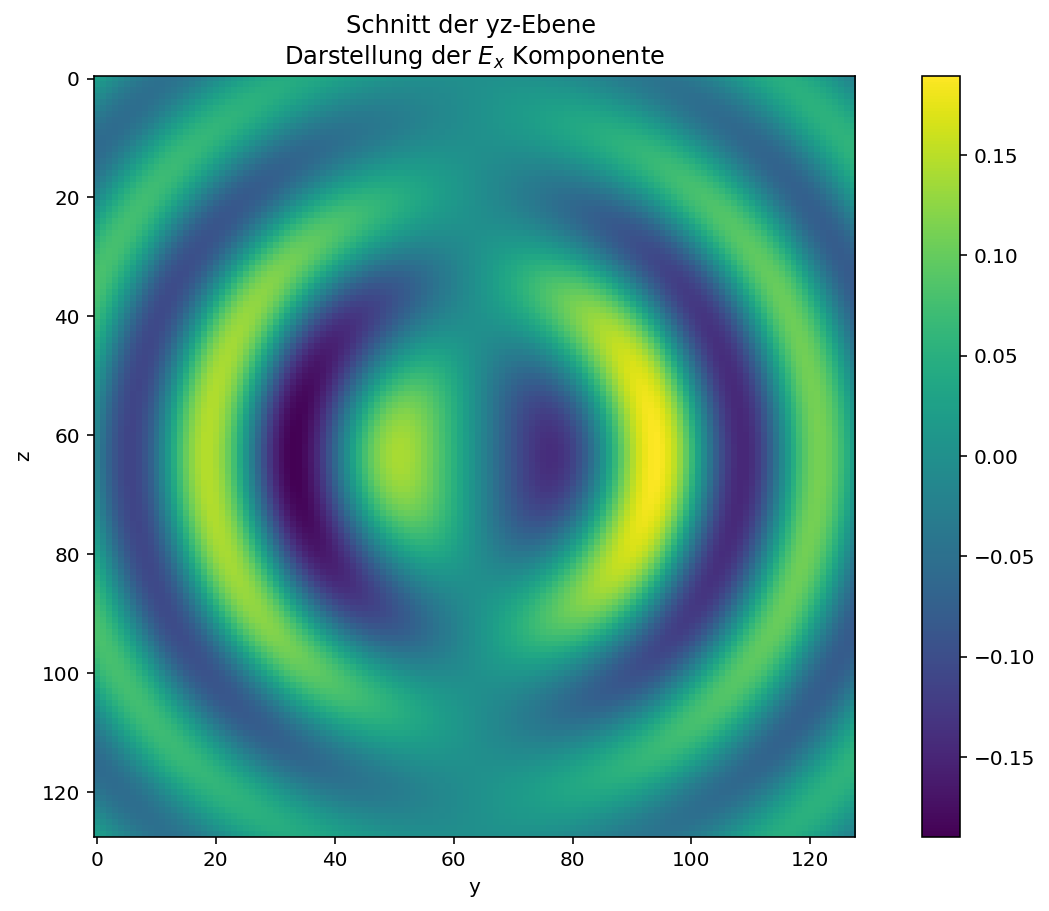

In [31]:
plt.imshow(E_field[relative_height_x_direction,:,:,x])
plt.colorbar()
plt.title('Schnitt der yz-Ebene \n'+ r'Darstellung der $E_x$ Komponente')
plt.xlabel('y')
plt.ylabel('z')

### Poynting Vektor

In [33]:
I_0 = sp.symbols('I', real=True)
k = sp.symbols('k', real=True)
l = sp.symbols('l', real=True)
eta = sp.symbols('eta', real=True)
beta = sp.symbols('beta', real=True)
d = sp.symbols('d', real=True)
r, theta, phi = sp.symbols('r theta phi', real=True)

In [34]:
def get_power_and_poynting_vector(E_theta, H_phi):
    r, theta, phi = sp.symbols('r theta phi', real=True)

    r_vector = sp.Matrix([r * sp.sin(theta) * sp.cos(phi),
                          r * sp.sin(theta) * sp.sin(phi),
                          r * sp.cos(theta)])
    dA = r_vector.diff(theta).cross(r_vector.diff(phi)).norm().simplify()

    E = sp.Matrix([0, E_theta, 0])
    H = sp.Matrix([0, 0, H_phi])
    W = 0.5 * E.cross(H.conjugate())
    W_r = W[0]
    P_rad = sp.integrate(W_r * dA, (theta, 0, sp.pi), (phi, 0, 2 * sp.pi))

    return W_r, P_rad

In [39]:
E_theta_ges = eta * 1j * I_0 * sp.exp(-1j * k * r) / (2 * sp.pi *r) * ((sp.cos(k * l / 2 * sp.cos(theta))-sp.cos(k * l / 2)) / sp.sin(theta))
H_theta_ges = E_theta_ges / eta
E_theta_ges
W_r, P_r = get_power_and_poynting_vector(E_theta_ges, H_theta_ges)
W_r

0.125*I**2*eta*(-cos(k*l/2) + cos(k*l*cos(theta)/2))**2/(pi**2*r**2*sin(theta)**2)

In [37]:
W = W_r
U = W*(r**2 / (4.5*eta*l**2))
U

0.0277777777777778*I**2*(-cos(k*l/2) + cos(k*l*cos(theta)/2))**2/(pi**2*l**2*sin(theta)**2)

In [40]:
#U = 2*sp.sin(theta)**2 *(1+sp.cos(k*d*sp.cos(theta) - beta))
#U
f = 1.8 * 10e9
c_0 = 3 * 10e8
lamd = c_0 / f
#d_constant = lamd / 4
k_constant = 2 * sp.pi / lamd
#beta_constant = sp.pi
I_constant = 1
l_constant = 1.25*lamd

In [41]:
U = U.subs([(k, k_constant), (I_0, I_constant),(l, l_constant)])
U

0.64*(cos(5*pi*cos(theta)/4) + sqrt(2)/2)**2/(pi**2*sin(theta)**2)

In [42]:
U_func = sp.lambdify((theta), U, modules='numpy')

In [43]:
def get_bf_radiation_pattern(theta):
    return U_func(theta)

In [44]:
def sph2cart(r, theta, phi):
    '''
    Function transform points stored in spherical coordinate system to points on Catersian coordinate system
    r is the radial distance
    theta is the vector of polar angles
    phi is the vector of azimuth angles
    '''
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z

<lambdifygenerated-7>:2: RuntimeWarning:

divide by zero encountered in true_divide



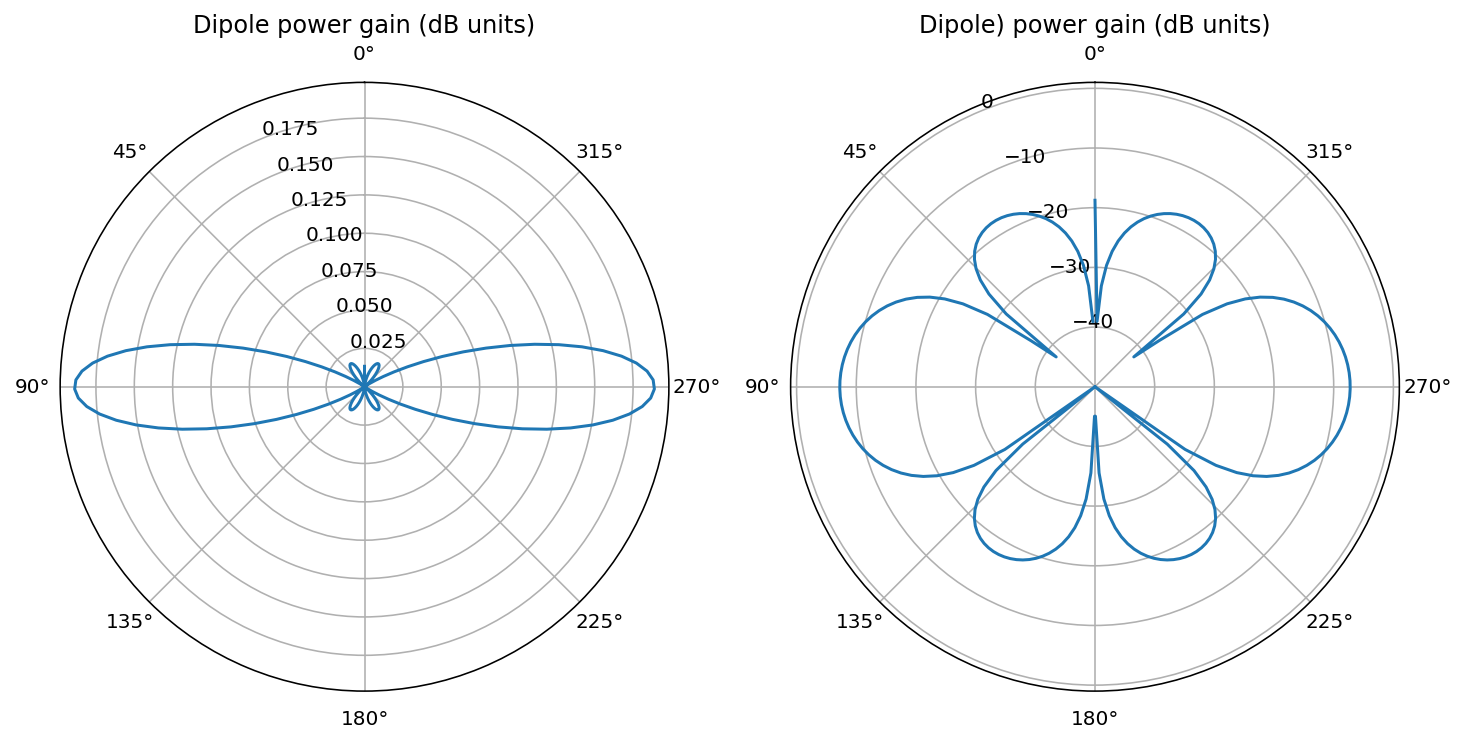

In [45]:
numPts = 200  # number of points for generating equally spaced polar and azimuth angles
theta = np.linspace(start=0, stop=2 * np.pi, num=numPts)  # N point vector for polar angle theta ranging from o to pi
#theta = np.asarray([0.0157])
g = get_bf_radiation_pattern(theta)
#print(g)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12, 10))
ax1.set_theta_zero_location("N")
lineObjects = ax1.plot(theta, g)
ax1.set_title('Dipole power gain (dB units)');

g = np.where(g == 0, np.finfo(float).eps,
             g)  # To avoid divide by zeros error in taking log10 replace 0 values by machine eps
gdB = 10 * np.log10(g)
gdB = np.where(gdB <= -50, -50, gdB)  # gain clipped to minimum -50 dB level for plot

ax2.set_theta_zero_location("N")
lineObjects = ax2.plot(theta, gdB)
ax2.set_title('Dipole) power gain (dB units)');
ax2.set_rmax(1);
ax2.set_rmin(-50)

/tmp/ipykernel_668/2929737794.py:8: RuntimeWarning:

invalid value encountered in multiply

/tmp/ipykernel_668/2929737794.py:9: RuntimeWarning:

invalid value encountered in multiply



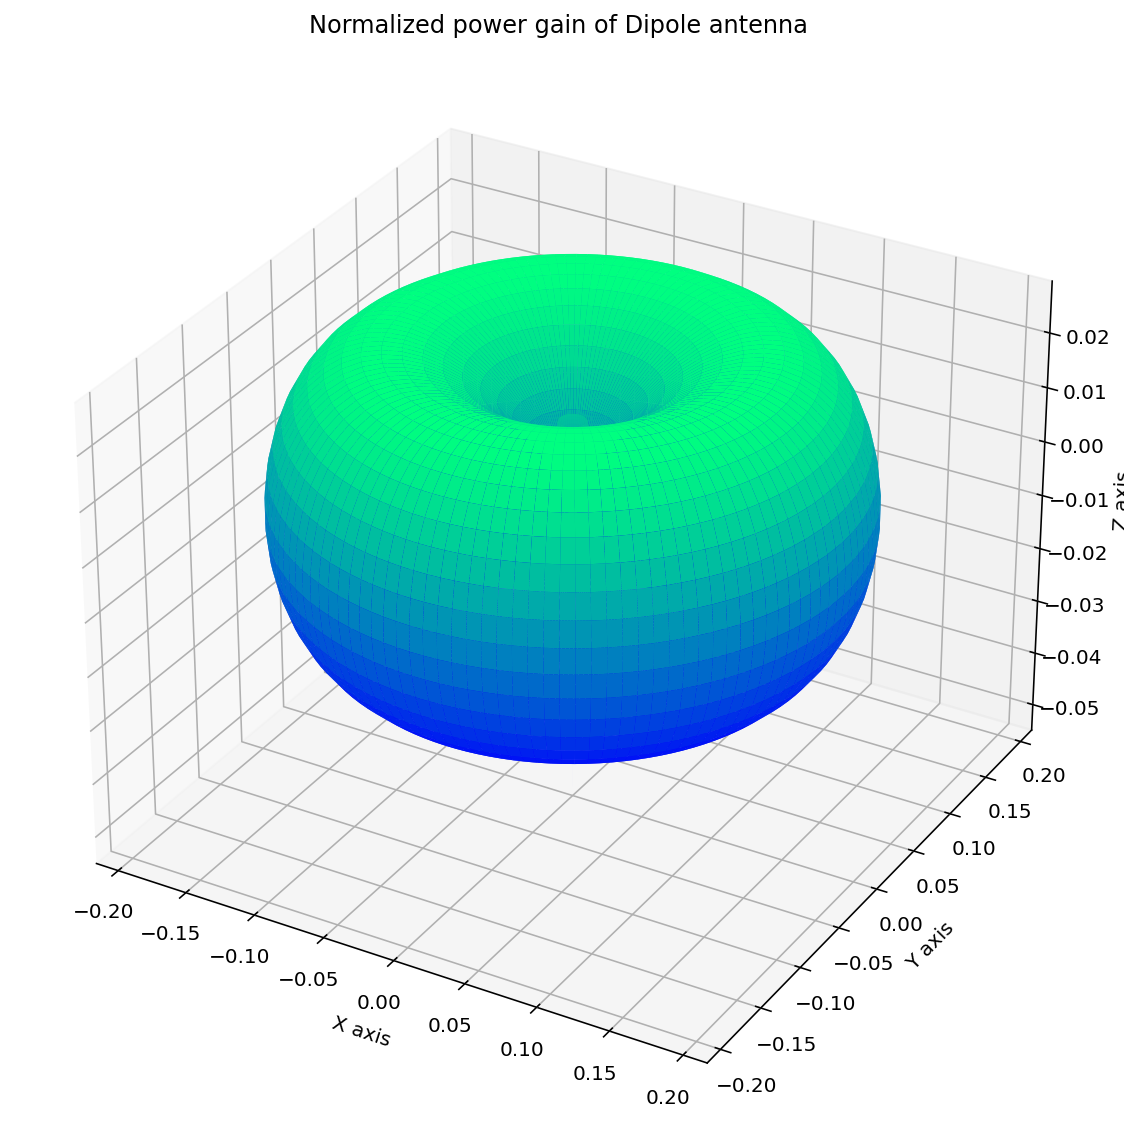

In [46]:
#%matplotlib qt
numPts = 2 ** 7
theta = np.linspace(start=0, stop=np.pi, num=numPts)  # N point vector for polar angle theta ranging from o to pi
phi = np.linspace(start=0, stop=2 * np.pi, num=numPts)  # N point vectors for azimuth angle ranging from o to 2pi
[P, T] = np.meshgrid(phi, theta)  # NxN coordinate meshgrid matrix
G = get_bf_radiation_pattern(T)
[X, Y, Z] = sph2cart(G, T,
                     P)  # transform points stored in spherical coordinate system to points on Catersian coordinate system

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12, 10))
ax.plot_surface(np.real(X), np.real(Y), np.real(Z), rstride=1, cstride=1, cmap='winter')
ax.set_title('Normalized power gain of Dipole antenna')
ax.set_xlabel('X axis');
ax.set_ylabel('Y axis');
ax.set_zlabel('Z axis');
#ax.view_init(azim=0, elev=90)